In [18]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
resampled_df = pd.read_csv("./resampled_multilingual_all_data.csv")
data = resampled_df[resampled_df['language'] == 'eng']
data

,dataset_name,text,label_name,label_value,label_definition,source,language
0,DGHD,Thanks to Boris people seem to think its okay ...,label,0,"a binary variable, indicating whether or not t...",NaN,eng
1,DGHD,Roots in that shithole directly mean they are ...,label,0,"a binary variable, indicating whether or not t...",NaN,eng
2,DGHD,Freedom and liberty to allow people to be what...,label,0,"a binary variable, indicating whether or not t...",NaN,eng
3,DGHD,"They should have done ""Their Loss"" as it's mor...",label,0,"a binary variable, indicating whether or not t...",NaN,eng
4,DGHD,"my cousin married an africa girl, they had the...",label,0,"a binary variable, indicating whether or not t...",NaN,eng
...,...,...,...,...,...,...,...
9327,DGHD,many of your followers seem to be chinks or bots,label,1,"a binary variable, indicating whether or not t...",NaN,eng
9328,DGHD,"Yeah. Verbose, wise-ass, know it all and downr...",label,1,"a binary variable, indicating whether or not t...",NaN,eng
9329,DGHD,The lady who works at the library is such an o...,label,1,"a binary variable, indicating whether or not t...",NaN,eng
9330,DGHD,"JK Rowling says; ""Feminazi""šTERF""šbitch""šwitch...",label,1,"a binary variable, indicating whether or not t...",NaN,eng


In [19]:
import nltk
from nltk.corpus import stopwords, words, wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.tokenize import TweetTokenizer
import re

nltk.download('words', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)

wnl = WordNetLemmatizer()
word_list = set(words.words())
stoplist = set(stopwords.words('english'))


def remove_url(text):
    text = re.sub(r'(https?://\S+)', '', text, flags=re.MULTILINE)
    return text

def tokenize_text(text):
    text = text.replace('.', ' ')
    tknzr = TweetTokenizer(strip_handles=True, reduce_len=True)
    rawwords = tknzr.tokenize(text)
    # words = [word.lower() for word in rawwords if word.lower() in word_list and not str.isdigit(word) and len(word) > 2]
    words = [word.lower() for word in rawwords if not word.isdigit()]
    return words

def clean_text(tweet):
    if isinstance(tweet, str):
      tweet = re.sub(r"@[A-Za-z0-9_-]+",'USR',tweet)
      tweet = re.sub(r"http\S+",'URL',tweet)

      # Remove \n and \t characters
      tweet = tweet.replace('\n', ' ')
      tweet = tweet.replace('\t', ' ')

      # Remove punctuation
      tweet = tweet.translate(str.maketrans('', '', punctuation))

      # Remove German quotes
      tweet = tweet.replace('„', '').replace('“', '')

      # Remove emojis
      tweet = re.sub(r'[^\w\s,]', '', tweet)

      # Strip whitespace
      tweet = tweet.strip()

      # Convert to lowercase
      tweet = tweet.lower()

    return tweet

In [20]:
data['tweets'] = data['text'].apply(remove_url)
data['tweets'] = data['tweets'].apply(tokenize_text)
data['tweets'] = data['tweets'].apply(clean_text)

data = data[~(data['tweets'].str.len() == 0)]
data['tweets'] = data['tweets'].apply(lambda x: ' '.join(x))

data

,dataset_name,text,label_name,label_value,label_definition,source,language,tweets
0,DGHD,Thanks to Boris people seem to think its okay ...,label,0,"a binary variable, indicating whether or not t...",NaN,eng,thanks to boris people seem to think its okay ...
1,DGHD,Roots in that shithole directly mean they are ...,label,0,"a binary variable, indicating whether or not t...",NaN,eng,roots in that shithole directly mean they are ...
2,DGHD,Freedom and liberty to allow people to be what...,label,0,"a binary variable, indicating whether or not t...",NaN,eng,freedom and liberty to allow people to be what...
3,DGHD,"They should have done ""Their Loss"" as it's mor...",label,0,"a binary variable, indicating whether or not t...",NaN,eng,"they should have done "" their loss "" as it's m..."
4,DGHD,"my cousin married an africa girl, they had the...",label,0,"a binary variable, indicating whether or not t...",NaN,eng,"my cousin married an africa girl , they had th..."
...,...,...,...,...,...,...,...,...
9327,DGHD,many of your followers seem to be chinks or bots,label,1,"a binary variable, indicating whether or not t...",NaN,eng,many of your followers seem to be chinks or bots
9328,DGHD,"Yeah. Verbose, wise-ass, know it all and downr...",label,1,"a binary variable, indicating whether or not t...",NaN,eng,"yeah verbose , wise-ass , know it all and down..."
9329,DGHD,The lady who works at the library is such an o...,label,1,"a binary variable, indicating whether or not t...",NaN,eng,the lady who works at the library is such an o...
9330,DGHD,"JK Rowling says; ""Feminazi""šTERF""šbitch""šwitch...",label,1,"a binary variable, indicating whether or not t...",NaN,eng,"jk rowling says ; "" feminazi "" šterf "" šbitch ..."


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def train_and_evaluate_models(df, tweet_column, target):
    le = LabelEncoder()
    df[target] = le.fit_transform(df[target])

    tfidf_vectorizer = TfidfVectorizer()

    models = {
        'KNN': KNeighborsClassifier(),
        'Logistic Regression': LogisticRegression(),
        'Random Forest': RandomForestClassifier(),
        'SVM': SGDClassifier(),
        'Naive Bayes': MultinomialNB()
    }

    y = df[target]
    x_train, x_test, y_train, y_test = train_test_split(df[tweet_column], y, test_size=0.2, random_state=7)

    for name, model in models.items():
        pipe = make_pipeline(tfidf_vectorizer, model)
        pipe.fit(x_train, y_train)
        y_pred = pipe.predict(x_test)

        print(f"{name}:\n{classification_report(y_test, y_pred)}")

        conf_mat = confusion_matrix(y_test, y_pred)
        sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
                    xticklabels=le.classes_, yticklabels=le.classes_)
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title(f'Confusion Matrix for {name}')
        plt.show()

KNN:
              precision    recall  f1-score   support

           0       0.88      0.06      0.11       962
           1       0.50      0.99      0.66       905

    accuracy                           0.51      1867
   macro avg       0.69      0.53      0.39      1867
weighted avg       0.69      0.51      0.38      1867



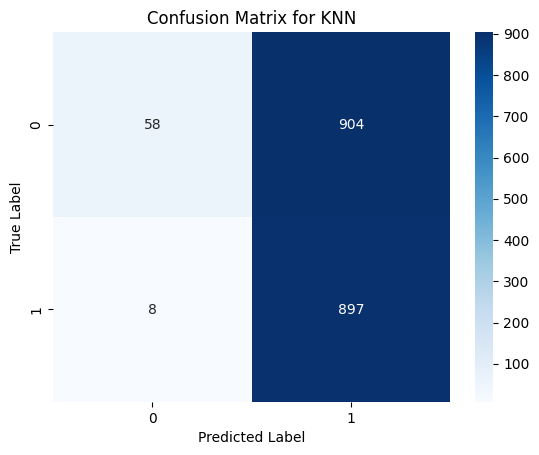

Logistic Regression:
              precision    recall  f1-score   support

           0       0.65      0.65      0.65       962
           1       0.63      0.62      0.62       905

    accuracy                           0.64      1867
   macro avg       0.64      0.64      0.64      1867
weighted avg       0.64      0.64      0.64      1867



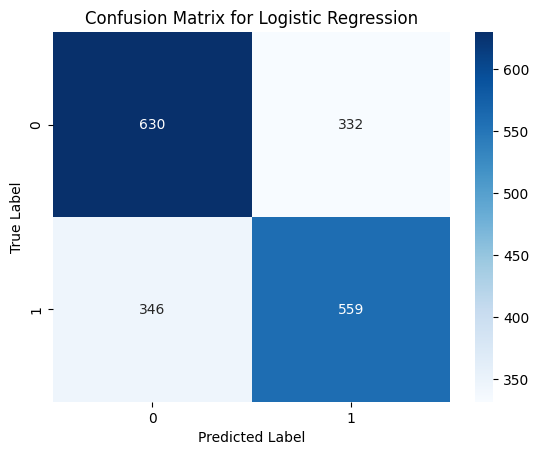

Random Forest:
              precision    recall  f1-score   support

           0       0.61      0.63      0.62       962
           1       0.59      0.57      0.58       905

    accuracy                           0.60      1867
   macro avg       0.60      0.60      0.60      1867
weighted avg       0.60      0.60      0.60      1867



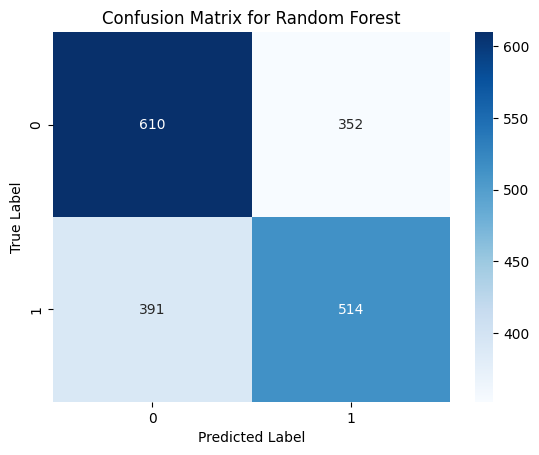

SVM:
              precision    recall  f1-score   support

           0       0.63      0.64      0.63       962
           1       0.61      0.60      0.61       905

    accuracy                           0.62      1867
   macro avg       0.62      0.62      0.62      1867
weighted avg       0.62      0.62      0.62      1867



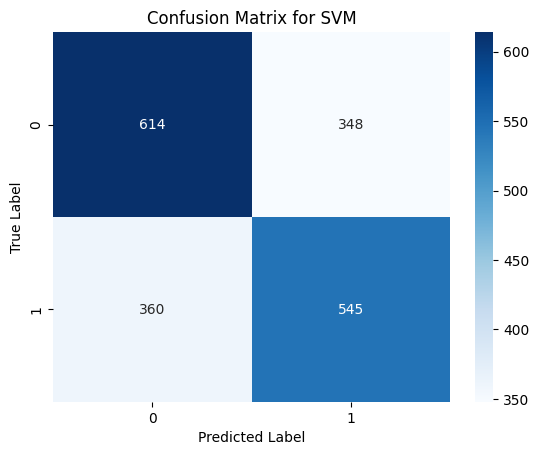

Naive Bayes:
              precision    recall  f1-score   support

           0       0.63      0.62      0.62       962
           1       0.60      0.61      0.60       905

    accuracy                           0.61      1867
   macro avg       0.61      0.61      0.61      1867
weighted avg       0.61      0.61      0.61      1867



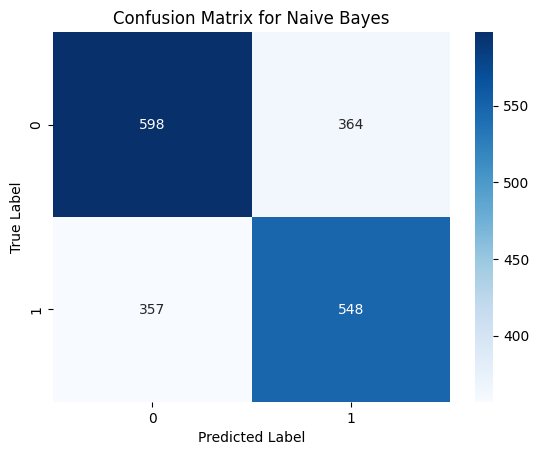

In [22]:
train_and_evaluate_models(data, 'tweets', 'label_value')

In [23]:
data_de = resampled_df[resampled_df['language'] == 'ger']
data_de['tweets'] = data_de['text'].apply(remove_url)
data_de['tweets'] = data_de['tweets'].apply(tokenize_text)
data_de['tweets'] = data_de['tweets'].apply(clean_text)

data_de = data_de[~(data_de['tweets'].str.len() == 0)]
data_de['tweets'] = data_de['tweets'].apply(lambda x: ' '.join(x))

data_de

,dataset_name,text,label_name,label_value,label_definition,source,language,tweets
9332,GAHD,so viele verdammte Idioten in diesem Land,label,0,"0 = not-hate speech, 1 = hate speech",Multi,ger,so viele verdammte idioten in diesem land
9333,GAHD,"Dies würde (könnte?) dafür sprechen, dass deut...",label,0,"0 = not-hate speech, 1 = hate speech",Multi,ger,"dies würde ( könnte ? ) dafür sprechen , dass ..."
9334,GAHD,"Wir haben uns verpflichtet, nichts von all dem...",label,0,"0 = not-hate speech, 1 = hate speech",Multi,ger,"wir haben uns verpflichtet , nichts von all de..."
9335,GAHD,Die slowakischen Gesundheitsbehörden gaben bek...,label,0,"0 = not-hate speech, 1 = hate speech",Multi,ger,die slowakischen gesundheitsbehörden gaben bek...
9336,GAHD,Diese 3 Sternzeichen haben eine gute Intuition!,label,0,"0 = not-hate speech, 1 = hate speech",Multi,ger,diese sternzeichen haben eine gute intuition !
...,...,...,...,...,...,...,...,...
18659,GAHD,"Warum spielt Embolo, dieser Affe in unserer Na...",label,1,"0 = not-hate speech, 1 = hate speech",Multi,ger,"warum spielt embolo , dieser affe in unserer n..."
18660,GAHD,Ausländer haben Angst vor harter Arbeit,label,1,"0 = not-hate speech, 1 = hate speech",Multi,ger,ausländer haben angst vor harter arbeit
18661,GAHD,Sie fragen sich alle: „Warum ist der Weihnacht...,label,1,"0 = not-hate speech, 1 = hate speech",Multi,ger,sie fragen sich alle : „ warum ist der weihnac...
18662,GAHD,Wer auf Asiaten steht muss sein Gehirn überprü...,label,1,"0 = not-hate speech, 1 = hate speech",Multi,ger,wer auf asiaten steht muss sein gehirn überprü...


KNN:
              precision    recall  f1-score   support

           0       0.69      0.54      0.60       962
           1       0.60      0.74      0.66       905

    accuracy                           0.64      1867
   macro avg       0.64      0.64      0.63      1867
weighted avg       0.65      0.64      0.63      1867



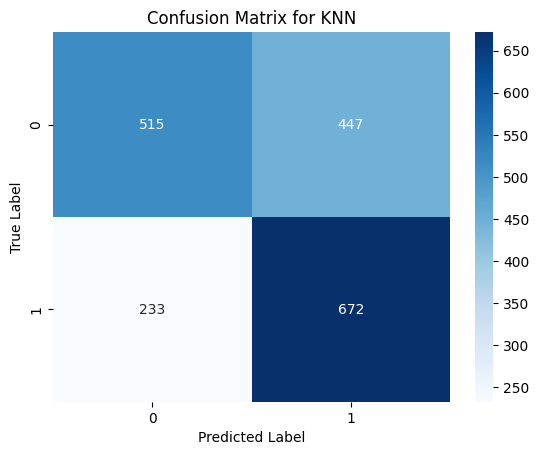

Logistic Regression:
              precision    recall  f1-score   support

           0       0.71      0.67      0.69       962
           1       0.67      0.71      0.69       905

    accuracy                           0.69      1867
   macro avg       0.69      0.69      0.69      1867
weighted avg       0.69      0.69      0.69      1867



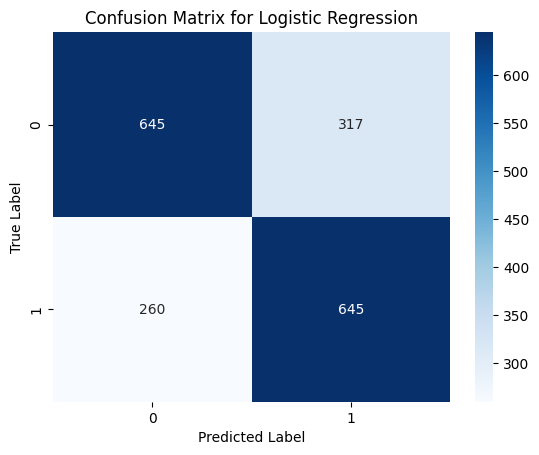

Random Forest:
              precision    recall  f1-score   support

           0       0.67      0.72      0.69       962
           1       0.67      0.62      0.65       905

    accuracy                           0.67      1867
   macro avg       0.67      0.67      0.67      1867
weighted avg       0.67      0.67      0.67      1867



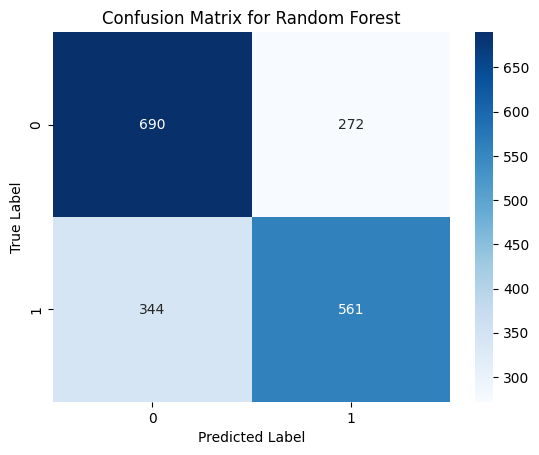

SVM:
              precision    recall  f1-score   support

           0       0.73      0.64      0.68       962
           1       0.66      0.74      0.70       905

    accuracy                           0.69      1867
   macro avg       0.69      0.69      0.69      1867
weighted avg       0.69      0.69      0.69      1867



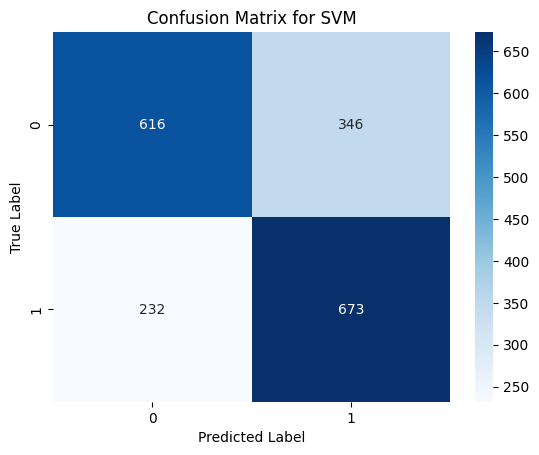

Naive Bayes:
              precision    recall  f1-score   support

           0       0.76      0.48      0.59       962
           1       0.60      0.84      0.70       905

    accuracy                           0.66      1867
   macro avg       0.68      0.66      0.65      1867
weighted avg       0.68      0.66      0.64      1867



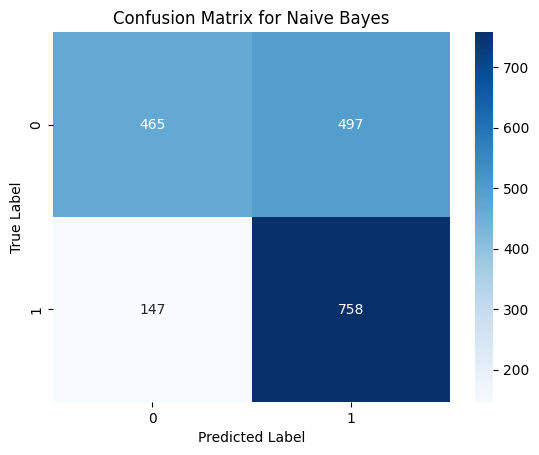

In [24]:
train_and_evaluate_models(data_de, 'tweets', 'label_value')